## Getting the data from ADLS

In [0]:
#importing required libraries
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#setting the path to ADLS data
spark.conf.set(
    "fs.azure.account.key.activityadls.dfs.core.windows.net", #activityadls is the storage account where the bronze layer is present
    "/oBRM0Em7O/JcyYgSBukNFhZP0nGFREiwgLfuCJo3+PaTB7wzEPXMrxCtMqi+dA8ZhK/EjMF0CTS+AStNPgGDA==" # This is the security key of the above storage account.
)

In [0]:
#Reading the data from ADLS container that is created
df = spark.read.csv('abfss://capstonecontainer@activityadls.dfs.core.windows.net/Capstoneproject/main/bank_data.csv') #capstonecontainer is the container of the Bronze Layer
display(df) # to display the dataframe that is read from the bronze layer

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17
1001,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1002,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
1003,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
1004,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
1005,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
1006,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
1007,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
1008,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
1009,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
1010,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Defining headers for the existing dataset

In [0]:
#defining the headers for the dataset
headers = ["Unique_Sequence_ID", "age", "job","marital_status","education","credit_default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","opened_new_td_act_no_yes"]

In [0]:
#Assign headers to the dataset
df1 = df.toDF(*headers)

In [0]:
df1.show()

+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|          job|marital_status|education|credit_default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1001| 30|   unemployed|       married|  primary|            no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown|                      no|
|              1002| 33|     services|       married|secondary|            no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure|                      no|
|              1003| 35|   management|        single| tertiary|       

### Verify Schema

In [0]:
#Verify Schema
df1.printSchema()

root
 |-- Unique_Sequence_ID: string (nullable = true)
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- education: string (nullable = true)
 |-- credit_default: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: string (nullable = true)
 |-- pdays: string (nullable = true)
 |-- previous: string (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_no_yes: string (nullable = true)



In [0]:
#checking the datatypes
df1.dtypes

Out[12]: [('Unique_Sequence_ID', 'string'),
 ('age', 'string'),
 ('job', 'string'),
 ('marital_status', 'string'),
 ('education', 'string'),
 ('credit_default', 'string'),
 ('balance', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'string'),
 ('month', 'string'),
 ('duration', 'string'),
 ('campaign', 'string'),
 ('pdays', 'string'),
 ('previous', 'string'),
 ('poutcome', 'string'),
 ('opened_new_td_act_no_yes', 'string')]

## Casting datatypes

In [0]:
df = df1.withColumn("Unique_Sequence_ID", col("Unique_Sequence_ID").cast("integer")) \
    .withColumn("age", col("age").cast("integer")) \
    .withColumn("credit_default", col("credit_default").cast("boolean")) \
    .withColumn("balance", col("balance").cast("integer")) \
    .withColumn("housing", col("housing").cast("boolean")) \
    .withColumn("loan", col("loan").cast("boolean")) \
    .withColumn("day", col("day").cast("integer")) \
    .withColumn("duration", col("duration").cast("integer")) \
    .withColumn("campaign", col("campaign").cast("integer")) \
    .withColumn("pdays", col("pdays").cast("integer")) \
    .withColumn("previous", col("previous").cast("integer")) \
    .withColumn("opened_new_td_act_no_yes", col("opened_new_td_act_no_yes").cast("boolean"))

## Verify Schema

In [0]:
df.dtypes

Out[14]: [('Unique_Sequence_ID', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('marital_status', 'string'),
 ('education', 'string'),
 ('credit_default', 'boolean'),
 ('balance', 'int'),
 ('housing', 'boolean'),
 ('loan', 'boolean'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('opened_new_td_act_no_yes', 'boolean')]

## Check datatypes

In [0]:
df.printSchema()

root
 |-- Unique_Sequence_ID: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- education: string (nullable = true)
 |-- credit_default: boolean (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: boolean (nullable = true)
 |-- loan: boolean (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_no_yes: boolean (nullable = true)



## Cache the dataframe

In [0]:
df.cache()

Out[16]: DataFrame[Unique_Sequence_ID: int, age: int, job: string, marital_status: string, education: string, credit_default: boolean, balance: int, housing: boolean, loan: boolean, contact: string, day: int, month: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, opened_new_td_act_no_yes: boolean]

##verify first few records

In [0]:
df.show(10)

+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|          job|marital_status|education|credit_default|balance|housing| loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1001| 30|   unemployed|       married|  primary|         false|   1787|  false|false|cellular| 19|  oct|      79|       1|   -1|       0| unknown|                   false|
|              1002| 33|     services|       married|secondary|         false|   4789|   true| true|cellular| 11|  may|     220|       1|  339|       4| failure|                   false|
|              1003| 35|   management|        single| tertiary|  

##Verify the total number of rows and columns

In [0]:
print('Total number of rows in the dataframe is {} \n'.format(df.count()))
print("Total number of columns in the dataframe is {}".format(len(df.columns)))

Total number of rows in the dataframe is 4521 

Total number of columns in the dataframe is 18


##Summary statistics

In [0]:
df.describe().show()

+-------+------------------+------------------+-------+--------------+---------+------------------+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+
|summary|Unique_Sequence_ID|               age|    job|marital_status|education|           balance| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|
+-------+------------------+------------------+-------+--------------+---------+------------------+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+
|  count|              4521|              4521|   4521|          4521|     4521|              4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|
|   mean|            3261.0| 41.17009511170095|   null|          null|     null|1422.6578190665782|    null|15.9152842291528

##maximum and minimum values in each column

In [0]:
#MAXIMUM VALUES
max_values = df.agg(*[max(i).alias(f"max_{i}") for i in df.columns]) #agg() --> i) for categorical -> repeated value in the column     ii) for numerical -> higest value in the column
max_values.show()

+----------------------+-------+-------+------------------+-------------+------------------+-----------+-----------+--------+-----------+-------+---------+------------+------------+---------+------------+------------+----------------------------+
|max_Unique_Sequence_ID|max_age|max_job|max_marital_status|max_education|max_credit_default|max_balance|max_housing|max_loan|max_contact|max_day|max_month|max_duration|max_campaign|max_pdays|max_previous|max_poutcome|max_opened_new_td_act_no_yes|
+----------------------+-------+-------+------------------+-------------+------------------+-----------+-----------+--------+-----------+-------+---------+------------+------------+---------+------------+------------+----------------------------+
|                  5521|     87|unknown|            single|      unknown|              true|      71188|       true|    true|    unknown|     31|      sep|        3025|          50|      871|          25|     unknown|                        true|
+-----------

In [0]:
#MINIMUM VALUES
min_values = df.agg(*[min(i).alias(f"min_{i}") for i in df.columns])
min_values.show()

+----------------------+-------+-------+------------------+-------------+------------------+-----------+-----------+--------+-----------+-------+---------+------------+------------+---------+------------+------------+----------------------------+
|min_Unique_Sequence_ID|min_age|min_job|min_marital_status|min_education|min_credit_default|min_balance|min_housing|min_loan|min_contact|min_day|min_month|min_duration|min_campaign|min_pdays|min_previous|min_poutcome|min_opened_new_td_act_no_yes|
+----------------------+-------+-------+------------------+-------------+------------------+-----------+-----------+--------+-----------+-------+---------+------------+------------+---------+------------+------------+----------------------------+
|                  1001|     19| admin.|          divorced|      primary|             false|      -3313|      false|   false|   cellular|      1|      apr|           4|           1|       -1|           0|     failure|                       false|
+-----------

##To find if there are any negative balances in the columns

In [0]:
neg_balances = df.filter(col("balance") < 0) #filtering the negative values from the balance column
neg_balances.show()

+------------------+---+------------+--------------+---------+--------------+-------+-------+-----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|         job|marital_status|education|credit_default|balance|housing| loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+------------+--------------+---------+--------------+-------+-------+-----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1010| 43|    services|       married|  primary|         false|    -88|   true| true| cellular| 17|  apr|     313|       1|  147|       2| failure|                   false|
|              1019| 25| blue-collar|        single|  primary|         false|   -221|   true|false|  unknown| 23|  may|     250|       1|   -1|       0| unknown|                   false|
|              1049| 32|entrepreneur|        single|  primary|   

##Replacing the negative balances with zero.

In [0]:
#withColumn() is used to add or replace the column. In this case withColumn() is used to replace the existing column.
replaced_negatives = df.withColumn("balance", when(col("balance") < 0, 0).otherwise(col("balance")))
replaced_negatives.show()

+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|          job|marital_status|education|credit_default|balance|housing| loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1001| 30|   unemployed|       married|  primary|         false|   1787|  false|false|cellular| 19|  oct|      79|       1|   -1|       0| unknown|                   false|
|              1002| 33|     services|       married|secondary|         false|   4789|   true| true|cellular| 11|  may|     220|       1|  339|       4| failure|                   false|
|              1003| 35|   management|        single| tertiary|  

##Creating a View in spark dataframe

In [0]:
#created a view to run sql queries on the dataframe
df.createOrReplaceTempView("dfview")
df.show(5)

+------------------+---+-----------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|        job|marital_status|education|credit_default|balance|housing| loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-----------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1001| 30| unemployed|       married|  primary|         false|   1787|  false|false|cellular| 19|  oct|      79|       1|   -1|       0| unknown|                   false|
|              1002| 33|   services|       married|secondary|         false|   4789|   true| true|cellular| 11|  may|     220|       1|  339|       4| failure|                   false|
|              1003| 35| management|        single| tertiary|         false

##Verify the target distribution.

In [0]:
#Verify the target distribution.
spark.sql("SELECT opened_new_td_act_no_yes FROM dfview Limit 15").show()

+------------------------+
|opened_new_td_act_no_yes|
+------------------------+
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                   false|
|                    true|
|                   false|
+------------------------+



#pairwise frequency

In [0]:
#To calculate pair wise frequency of categorical columns i.e., target and loan columns we use crosstab()
df.crosstab('opened_new_td_act_no_yes', 'loan').show()

+-----------------------------+-----+----+
|opened_new_td_act_no_yes_loan|false|true|
+-----------------------------+-----+----+
|                        false| 3352| 648|
|                         true|  478|  43|
+-----------------------------+-----+----+



In [0]:
df.groupBy('opened_new_td_act_no_yes', 'loan').count().show()

+------------------------+-----+-----+
|opened_new_td_act_no_yes| loan|count|
+------------------------+-----+-----+
|                    true|false|  478|
|                    true| true|   43|
|                   false|false| 3352|
|                   false| true|  648|
+------------------------+-----+-----+



##Finding the term deposit opted for different job categories.

In [0]:
df.crosstab('opened_new_td_act_no_yes', 'job').show()

+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|opened_new_td_act_no_yes_job|admin.|blue-collar|entrepreneur|housemaid|management|retired|self-employed|services|student|technician|unemployed|unknown|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|                       false|   420|        877|         153|       98|       838|    176|          163|     379|     65|       685|       115|     31|
|                        true|    58|         69|          15|       14|       131|     54|           20|      38|     19|        83|        13|      7|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+



##Finding the term deposit opted for different job categories.

In [0]:
term_opted = df.filter(col("opened_new_td_act_no_yes")=='True')
final_term_opted=term_opted.crosstab('opened_new_td_act_no_yes', 'job')
final_term_opted.show()

+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|opened_new_td_act_no_yes_job|admin.|blue-collar|entrepreneur|housemaid|management|retired|self-employed|services|student|technician|unemployed|unknown|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|                        true|    58|         69|          15|       14|       131|     54|           20|      38|     19|        83|        13|      7|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+



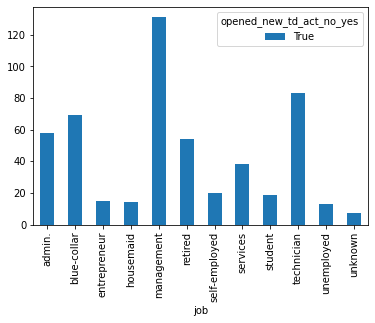

In [0]:
#Plotting the Bar chart for above data 
# Converting PySpark DataFrame to Pandas DataFrame
pandas_df = term_opted.toPandas()

# Plotting a bar chart
pandas_df.groupby(['job', 'opened_new_td_act_no_yes']).size().unstack().plot(kind='bar')

# Displaying the plot
plt.show()


##Term deposit not opted for different job categories.

In [0]:
term_not_opted = df.filter(col("opened_new_td_act_no_yes")=='False')
term_not_opted.crosstab('opened_new_td_act_no_yes', 'job').show()

+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|opened_new_td_act_no_yes_job|admin.|blue-collar|entrepreneur|housemaid|management|retired|self-employed|services|student|technician|unemployed|unknown|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+
|                       false|   420|        877|         153|       98|       838|    176|          163|     379|     65|       685|       115|     31|
+----------------------------+------+-----------+------------+---------+----------+-------+-------------+--------+-------+----------+----------+-------+



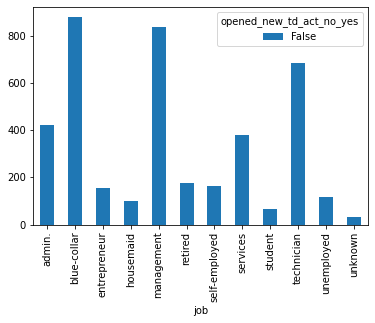

In [0]:
#Plotting the Bar chart for above data 
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = term_not_opted.toPandas()

# Plot a bar chart
pandas_df.groupby(['job', 'opened_new_td_act_no_yes']).size().unstack().plot(kind='bar')

# Display the plot
plt.show()

##Term deposit not opted for different education categories.

In [0]:
term_not_opted_edu = df.filter(col("opened_new_td_act_no_yes")=='False')
term_not_opted_edu.crosstab('opened_new_td_act_no_yes', 'education').show()

+----------------------------------+-------+---------+--------+-------+
|opened_new_td_act_no_yes_education|primary|secondary|tertiary|unknown|
+----------------------------------+-------+---------+--------+-------+
|                             false|    614|     2061|    1157|    168|
+----------------------------------+-------+---------+--------+-------+



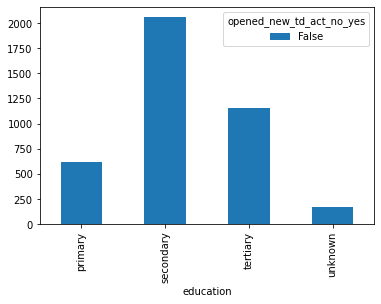

In [0]:
#Plotting the Bar chart for above data 
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = term_not_opted_edu.toPandas()

# Plot a bar chart
pandas_df.groupby(['education', 'opened_new_td_act_no_yes']).size().unstack().plot(kind='bar')

# Display the plot
plt.show()

##Term deposit not opted for different marital status categories.

In [0]:
term_not_opted_marital = df.filter(col("opened_new_td_act_no_yes")=='False')
term_not_opted_marital.crosstab('opened_new_td_act_no_yes', 'marital_status').show()

+---------------------------------------+--------+-------+------+
|opened_new_td_act_no_yes_marital_status|divorced|married|single|
+---------------------------------------+--------+-------+------+
|                                  false|     451|   2520|  1029|
+---------------------------------------+--------+-------+------+



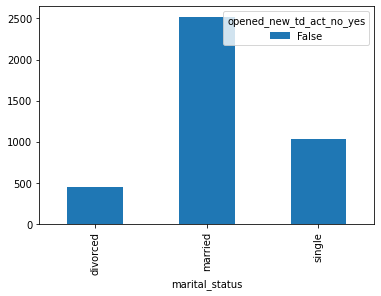

In [0]:
#Plotting the Bar chart for above data 
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = term_not_opted_marital.toPandas()

# Plot a bar chart
pandas_df.groupby(['marital_status', 'opened_new_td_act_no_yes']).size().unstack().plot(kind='bar')

# Display the plot
plt.show()

##Plotting a heat map for the entire dataframe

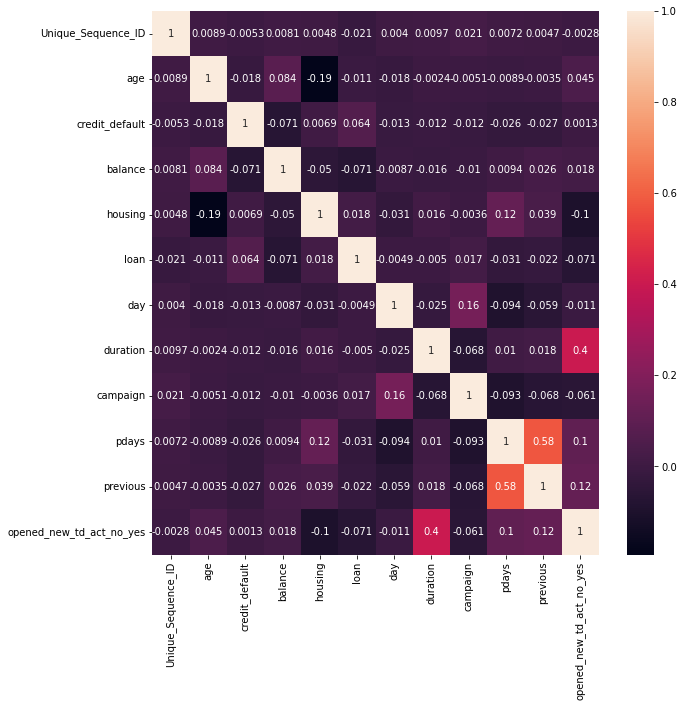

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot a heat map
plt.figure(figsize=(10, 10))  # Set the size of the plot
sns.heatmap(pandas_df.corr(), annot=True)  # Use the correlation matrix as input for the heat map


# Display the plot
plt.show()


##Removing null values in the dataframe

In [0]:
null_removed = df.na.drop()
null_removed.show() 

+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|Unique_Sequence_ID|age|          job|marital_status|education|credit_default|balance|housing| loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+-----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1001| 30|   unemployed|       married|  primary|         false|   1787|  false|false|cellular| 19|  oct|      79|       1|   -1|       0| unknown|                   false|
|              1002| 33|     services|       married|secondary|         false|   4789|   true| true|cellular| 11|  may|     220|       1|  339|       4| failure|                   false|
|              1003| 35|   management|        single| tertiary|  

##Splitting the data into training and testing

In [0]:
training_data, testing_data = df.randomSplit([0.8, 0.2], seed=123) #randomSplit() splits the data randomly based on the given weight
print("count of Training data: " + str(training_data.count()))
print("count of Testing data: " + str(testing_data.count()))

count of Training data: 3609
count of Testing data: 912


##Writing the transformed data into Gold Layer

In [0]:
spark.conf.set(
    "fs.azure.account.key.capstonegoldlayer.dfs.core.windows.net",
    "3VopVhER0ugJhXGRrsihW10O3f3yZCoGwtj5UgE2lBGS96WXNxbHRK8lc2FPvTJ0fdzzI6ckRAn8+AStiIaD8A=="
)

In [0]:
# Defining the output path in ADLS gold layer
output_path = "abfss://goldcontainer@capstonegoldlayer.dfs.core.windows.net/"

# Write the DataFrame to ADLS
df.write.format("delta").mode("overwrite").save(output_path)
